In [ ]:
#Lop:DHCNTT17A
#MSSV: 22719711
#HoTen: Phan Phước Hiệp

In [31]:
#import thư viện
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [32]:
#load data
thietbi = pd.read_csv('thietbi.csv')
nguoidung_thietbi = pd.read_csv('nguoidung_thietbi.csv')
nguoidung_sudung = pd.read_csv('nguoidung_sudung.csv')

In [33]:
#Đổi tên cột cần thiết
thietbi.rename(columns={'Retail Branding': 'Branding', 'Marketing Name': 'MarketingName'}, inplace=True)

In [34]:
#Trộn bảng người dùng với nguoidung_thietbi
dfKetQua = pd.merge(nguoidung_sudung, nguoidung_thietbi[['use_id', 'platform', 'device']], on='use_id')
#hoặc dùng left-join
dfKetQuaL = pd.merge(nguoidung_sudung, nguoidung_thietbi[['use_id', 'platform', 'device']], on='use_id', how='left')

In [35]:
dfKetQua.head(5)
# dfKetQuaL.head(5)

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device
0,21.97,4.82,1557.33,22787,android,GT-I9505
1,1710.08,136.88,7267.55,22788,android,SM-G930F
2,1710.08,136.88,7267.55,22789,android,SM-G930F
3,94.46,35.17,519.12,22790,android,D2303
4,71.59,79.26,1557.33,22792,android,SM-G361F


In [36]:
#Tiếp tục inner-join bảng thietbi và dfKetQua để có thêm 2 cột Model và Branding trong
#bảng kết quả cuối cùng.

#dùng inner-jon
dfKetQua = pd.merge(dfKetQua, thietbi[['Branding', 'Model']],
                   left_on='device',
                   right_on='Model')
#hoặc dùng left-join
# dfKetQuaL = pd.merge(dfKetQuaL, thietbi[['Branding', 'Model']],
#                     left_on='device',
#                     right_on='Model', how='left')

In [37]:
#liệt kê 5 dòng đầu tiên các mẫu thiết bị (cột device) bắt đầu bằng GT
dfKetQua[dfKetQua.device.str.startswith('GT')].head(5)

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device,Branding,Model
0,21.97,4.82,1557.33,22787,android,GT-I9505,Samsung,GT-I9505
1,69.80,14.70,25955.55,22801,android,GT-I9505,Samsung,GT-I9505
2,249.26,253.22,1557.33,22875,android,GT-I9505,Samsung,GT-I9505
3,249.26,253.22,1557.33,22876,android,GT-I9505,Samsung,GT-I9505
4,83.46,114.06,3114.67,22880,android,GT-I9505,Samsung,GT-I9505


In [38]:
#thống kê trung bình số phút hàng tháng, trung bình sms và trung bình data, số lượng
#sử dụng của các nhãn hàng
dfKetQua.groupby('Branding').agg({
    'outgoing_mins_per_month': 'mean',
    'outgoing_sms_per_month': 'mean',
    'monthly_mb': 'mean',
    'use_id': 'count'
})

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id
Branding,,,,
HTC,299.842955,93.059318,5144.077955,44
Huawei,81.526667,9.500000,1561.226667,3
LGE,111.530000,12.760000,1557.330000,2
Lava,60.650000,261.900000,12458.670000,2
Lenovo,215.920000,12.930000,1557.330000,2
Motorola,95.127500,65.666250,3946.500000,16
OnePlus,354.855000,48.330000,6575.410000,6
Samsung,191.010093,92.390463,4017.318889,108
Sony,177.315625,40.176250,3212.000625,16


In [39]:
import seaborn as sns

In [40]:
#Trực quan số lượng người dùng các nhãn hàng
dfKetQua.head(5)

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device,Branding,Model
0,21.97,4.82,1557.33,22787,android,GT-I9505,Samsung,GT-I9505
1,69.80,14.70,25955.55,22801,android,GT-I9505,Samsung,GT-I9505
2,249.26,253.22,1557.33,22875,android,GT-I9505,Samsung,GT-I9505
3,249.26,253.22,1557.33,22876,android,GT-I9505,Samsung,GT-I9505
4,83.46,114.06,3114.67,22880,android,GT-I9505,Samsung,GT-I9505


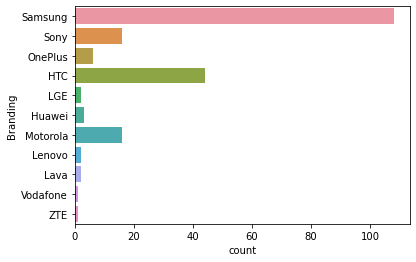

In [43]:
sns.countplot(y='Branding', data=dfKetQua)
plt.show()

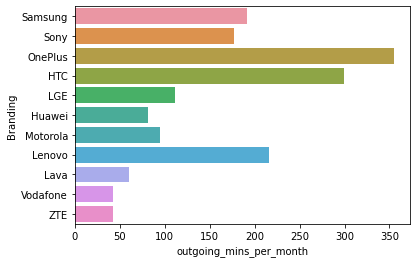

In [66]:
#9. Trực quan hóa dữ liệu trung bình phút gọi, trung bình sms và dung lượng sử dụng trên
# từng nhóm nhãn hàng bán lẻ
import seaborn as sns
import matplotlib.pyplot as plt


# Biểu đồ cho trung bình phút gọi
sns.barplot(y='Branding', x='outgoing_mins_per_month', data=dfKetQua, orient='horizontal', ci=None)
plt.show()


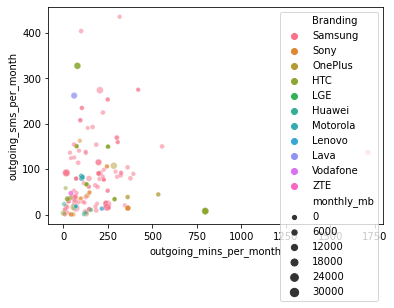

In [74]:
#10.Khảo sát tương quan giữa phút gọi, sms và dung lượng trên từng nhóm nhãn hàng
sns.scatterplot(x = 'outgoing_mins_per_month', y = 'outgoing_sms_per_month', data=dfKetQua, hue='Branding', alpha=0.5, size='monthly_mb')
plt.legend(loc="upper right")
plt.show()

In [75]:
import scipy.stats as sts

In [79]:
#11. Hãy kiểm định xem trung bình outgoing_mins_per_month có bằng 200 phút
t_stat1, p_val1 = sts.ttest_1samp(dfKetQua['outgoing_mins_per_month'], 200)

if p_val1 < 0.05:
    print("Không đủ dữ kiện để chứng mình rằng trung bình outgoing_mins_per_month có bằng 200 phút")
else:
    print("Trung bình outgoing_mins_per_month có bằng 200 phút")

Trung bình outgoing_mins_per_month có bằng 200 phút


In [81]:
#12. Hãy kiểm định xem trung bình outgoing_sms_per_month có bằng 100 tin nhắn
t_stat2, p_val2 = sts.ttest_1samp(dfKetQua['outgoing_sms_per_month'], 100)
if p_val2 < 0.05:
    print("Không đủ dữ kiện để chứng minh rằng trung bình outgoing_sms_per_month có bằng 100 tin nhắn")
else:
    print("Trung bình outgoing_sms_per_month có bằng 100 tin nhắn")

Không đủ dữ kiện để chứng minh rằng trung bình outgoing_sms_per_month có bằng 100 tin nhắn


In [83]:
#13. Hãy kiểm định xem trung bình monthly_mb có bằng 2048 mb
t_stat3, p_val3 = sts.ttest_1samp(dfKetQua['monthly_mb'], 2048)
if p_val3 < 0.05:
    print("Không đủ dữ kiện để chứng minh rằng trung bình monthly_mb có bằng 2048 mb")
else:
    print("Trung bình monthly_mb có bằng 2048 mb")


Không đủ dữ kiện để chứng minh rằng trung bình monthly_mb có bằng 2048 mb


In [84]:
#14. Hãy tạo ma trận tương quan giữa [outgoing_mins_per_month, outgoing_sms_per_month,
# monthly_mb] và sắp xếp tăng dần về mức độ tương quan

matrix = dfKetQua[['outgoing_mins_per_month', 'outgoing_sms_per_month', 'monthly_mb']].corr()

sorted_corr = matrix.unstack().sort_values(ascending=True)
print(sorted_corr)


outgoing_sms_per_month   monthly_mb                -0.046049
monthly_mb               outgoing_sms_per_month    -0.046049
outgoing_mins_per_month  outgoing_sms_per_month    -0.016494
outgoing_sms_per_month   outgoing_mins_per_month   -0.016494
outgoing_mins_per_month  monthly_mb                 0.213489
monthly_mb               outgoing_mins_per_month    0.213489
outgoing_mins_per_month  outgoing_mins_per_month    1.000000
outgoing_sms_per_month   outgoing_sms_per_month     1.000000
monthly_mb               monthly_mb                 1.000000
dtype: float64


In [87]:
#15. Kiểm định xem outgoing_mins_per_month, outgoing_sms_per_month có tương quan
correlation, p_value = sts.pearsonr(dfKetQua['outgoing_mins_per_month'], dfKetQua['outgoing_sms_per_month'])

if p_value > 0.05:
    print("Có sự tương quan giữa outgoing_mins_per_month và outgoing_sms_per_month")
else:
    print("Không có sự tương quan giữa outgoing_mins_per_month và outgoing_sms_per_month")

Có sự tương quan giữa outgoing_mins_per_month và outgoing_sms_per_month


In [91]:
#16. Hãy kiểm định xem có mối quan hệ nào giữa platform và branding
contingency_table = pd.crosstab(dfKetQua['platform'], dfKetQua['Branding'])

chi2, p, dof, expected = sts.chi2_contingency(contingency_table)

if p > 0.05:
    print("Có mối quan hệ giữa platform và Retail Branding")
else:
    print("Không có mối quan hệ giữa platform và Retail Branding")


Có mối quan hệ giữa platform và Retail Branding


In [114]:
#17. Hãy kiểm định xem có mối quan hệ nào giữa monthly_mb và platform
from scipy.stats import kruskal

# Lọc dữ liệu để loại bỏ các giá trị thiếu
dfKetQua_clean = dfKetQua.dropna(subset=['platform', 'monthly_mb'])

# Tạo danh sách các giá trị monthly_mb cho từng nhóm platform
groups = [group['monthly_mb'].values for name, group in dfKetQua_clean.groupby('platform') if len(group) > 0]

if len(groups) < 2:
    print("Không đủ dữ liệu để thực hiện kiểm định Kruskal-Wallis")
else:
    stat, p = kruskal(*groups)
    print(f'Kruskal-Wallis H-statistic: {stat}, P-value: {p}')

    if p > 0.05:
        print("Có mối quan hệ giữa monthly_mb và platform")
    else:
        print("Không có mối quan hệ giữa monthly_mb và platform")


Không đủ dữ liệu để thực hiện kiểm định Kruskal-Wallis


In [116]:
#18. Hãy kiểm định xem có mối quan hệ nào giữa monthly_mb và platform theo loại branding

# Loại bỏ các hàng có giá trị thiếu
dfKetQua_clean = dfKetQua.dropna(subset=['platform', 'monthly_mb', 'Branding'])

# Tạo danh sách các giá trị monthly_mb cho từng nhóm platform theo từng loại branding
grouped_data = dfKetQua_clean.groupby(['platform', 'Branding'])['monthly_mb'].apply(list)

# Tạo danh sách các giá trị monthly_mb cho từng nhóm tương tác platform + branding
groups = [group for group in grouped_data if len(group) > 0]

if len(groups) < 2:
    print("Không đủ dữ liệu để thực hiện kiểm định Kruskal-Wallis")
else:
    stat, p = kruskal(*groups)
    if p > 0.05:
        print("Có mối quan hệ giữa monthly_mb và platform theo loại branding")
    else:
        print("Không có mối quan hệ giữa monthly_mb và platform theo loại branding")


Có mối quan hệ giữa monthly_mb và platform theo loại branding


In [118]:
# Dữ liệu sạch, loại bỏ các giá trị thiếu
dfKetQua_clean = dfKetQua.dropna(subset=['outgoing_mins_per_month', 'outgoing_sms_per_month', 'monthly_mb'])

# Xác định các biến độc lập và phụ thuộc
X = dfKetQua_clean[['outgoing_mins_per_month', 'outgoing_sms_per_month']]
y = dfKetQua_clean['monthly_mb']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

# Hiển thị kết quả hồi quy
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             monthly_mb   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     4.925
Date:                Sat, 11 Jan 2025   Prob (F-statistic):            0.00818
Time:                        08:28:31   Log-Likelihood:                -2005.3
No. Observations:                 201   AIC:                             4017.
Df Residuals:                     198   BIC:                             4027.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    3

In [107]:
#20
import statsmodels.api as sm

X = dfKetQua[['outgoing_mins_per_month', 'outgoing_sms_per_month']]
y = dfKetQua['monthly_mb']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

def predict_monthly_mb(outgoing_mins, outgoing_sms):
    input_data = np.array([[1, outgoing_mins, outgoing_sms]])  # Thêm cột hằng số vào đầu dữ liệu đầu vào
    predicted_mb = model.predict(input_data)
    return predicted_mb[0]

if __name__ == "__main__":
    outgoing_mins = float(input("Nhập số phút gọi (outgoing_mins_per_month): "))  
    outgoing_sms = float(input("Nhập số tin nhắn (outgoing_sms_per_month): "))  

    predicted_mb = predict_monthly_mb(outgoing_mins, outgoing_sms)
    print(f"Dự báo dung lượng internet (monthly_mb) cho {outgoing_mins} phút gọi và {outgoing_sms} tin nhắn: {predicted_mb:.2f} MB")

Nhập số phút gọi (outgoing_mins_per_month): 50
Nhập số tin nhắn (outgoing_sms_per_month): 75
Dự báo dung lượng internet (monthly_mb) cho 50.0 phút gọi và 75.0 tin nhắn: 3543.20 MB
